In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.shape

(404290, 6)

*quite large dataset to handle*

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
68468,68468,118317,118318,Which is the most popular database language?,Where can I get free Email database for U.S?,0
12124,12124,6679,16932,How do I get meth out of my system in 3 days?,How can I flush meth out of my blood?,1
375003,375003,478221,505987,Which is a suitable inpatient drug and alcohol...,Which is a suitable inpatient drug and alcohol...,0
207793,207793,65234,162318,How do you potty train large puppies?,What's the easiest training system to potty tr...,1
327478,327478,453904,453905,If a car was falling from a bridge with a pers...,If I jump at the right time in a falling elava...,0
312653,312653,437129,75650,What are the best digital marketing strategies?,What are some of the best digital marketing ca...,0
256112,256112,262205,267741,What is the difference between a savings accou...,What is the difference between current account...,1
5251,5251,10339,10340,Which protein supplement is best for gym to ga...,I'm in love with an christian lebanese girl th...,0
357827,357827,487232,487233,Why do squirrels eat so fast?,How do squirrels chew so fast?,0
125490,125490,144319,202437,"In the film La La Land, does Ryan Gosling actu...","What is the meaning of the song ""City of Stars...",0


In [7]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
# duplicate rows
df.duplicated().sum()

0

no duplicates found

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

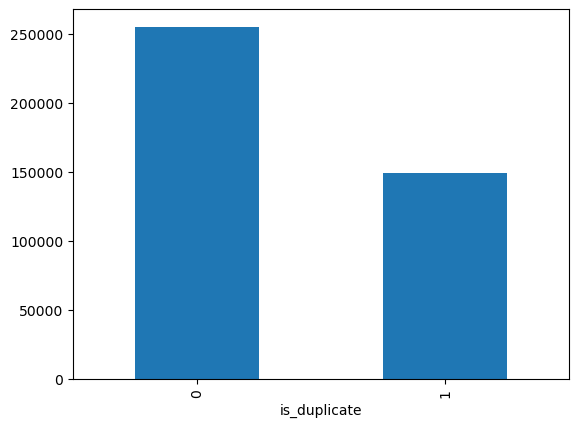

In [10]:
# distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count()) * 100)

df['is_duplicate'].value_counts().plot(kind='bar')

majority is of no duplicates. **Imbalanced dataset biased towards no duplicates.**

In [17]:
# unique questions

qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("number of unique questions: ", np.unique(qids).shape[0])

x = qids.value_counts() > 1
print('number of repeated questions: ', x[x].shape[0])

# """
# x[x] - only consider those values which satisfies the given condition
# """

number of unique questions:  537933
number of repeated questions:  111780


'\nx[x] - only consider those values which satisfies the given condition\n'

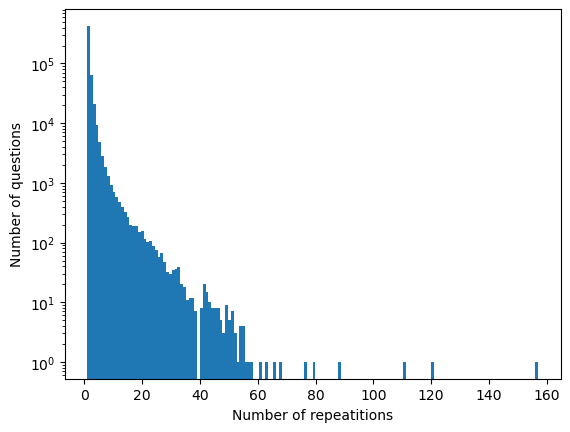

In [21]:
# repeated questions histogram

plt.hist(qids.value_counts().values, bins=160)
plt.yscale('log')
plt.xlabel('Number of repeatitions')
plt.ylabel('Number of questions')
plt.show()